# KDAG TASK ROUND : TASK 1
The task uses four **fuzzy matching algorithms** to correct spellings from the responses received by students where different career aspirations were mentioned. This data is then used to plot a bar graph where number of students were detected against the respective careers. <br><br>
Four Fuzzy Matching Algorithms that were used are:
- Vectorization and Cosine Similarity
- Jaccard Similarity
- N Gram Similarity
- Levenshtein Distance 




First of all we will import all the libraries which we will use. Next using file handling in python we will import target dataset from a csv file which contains the same. All the operations will be performed on this extracted dataset.<br>
> Please make sure you have the correct path set in for your csv file opener to extract the dataset without any issue


In [1]:
# importing required libraries 
import numpy as np 
import csv 
import matplotlib.pyplot as plt
# importing target dataset from a csv file
dfile=open("datasheet.csv","r",newline='\n')
datareader=csv.reader(dfile)
data=[]
for row in datareader:
    for col in row:
        data.append(col)
# correctly spelled career_options
career_options = ["Doctor", "Lawyer", "Teacher", "Engineer", "Accountant", "Nurse", "Police", "Architect", "Dentist", "Pharmacist"]
tester = "doktoor"     # tester word is taken to check if our method is working fine or not

Next is a method described for plotting the required bar graph. This takes the count of each career option as input parameter and displays the bar graph according to it.

In [2]:
# implementing graph of corrected spellings
def graph(corrected):
    count=[]
    for i in career_options:
        count.append(corrected.count(i))

    # creating the bar plot
    plt.figure(figsize = (10, 5))
    plt.bar(career_options, count , color ='blue', width = 0.4)
    plt.xlabel("Career Options")
    plt.ylabel("No. of aspirants")
    plt.title("Career Aspirations of Students")
    plt.show()

## Vectorization and Cosine Similarity
Vectorization, in the context of text analysis and fuzzy matching, refers to the process of
converting textual data (like words or short phrases) into numerical vectors. These
vectors can then be used for various tasks, including calculating cosine similarity.
<br><br>
The conversion of a word into a vector here is done by implementing a **26-D vector** and *each dimension represents the count of an english alphabet/character in that word*. Next every word in target dataset and the career options correct spelling dataset and converted to vectors and the cosine similarity between them is found out. The **max cosine similarity** gives us the correct word.

In [3]:
# converting a string into vector 
def vector(word):
    s="abcdefghijklmnopqrstuvwxyz"
    vect=np.zeros((26,), dtype=int)
    for j in range(len(s)):
        vect[j]=word.count(s[j])
    return vect

# fuction to find the cosine between two vectors 
def cosine_sim(a,b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

# word is checked against every word in correct dataset and the word with max cosine value is given
def coscorrection(word):
    vect_list=[]
    for i in career_options:
        k=vector(i.lower())
        vect_list.append(k)
    word=vector(word.lower())
    cos2=[]
    for i in vect_list:
        cos2.append(cosine_sim(word,i))
    index = cos2.index(max(cos2))
    return career_options[index]

print(coscorrection(tester))

Doctor


Here the Cosine Similarity matching is executed for each of the mispelled words in the target dataset and a bar graph accordingly is plotted

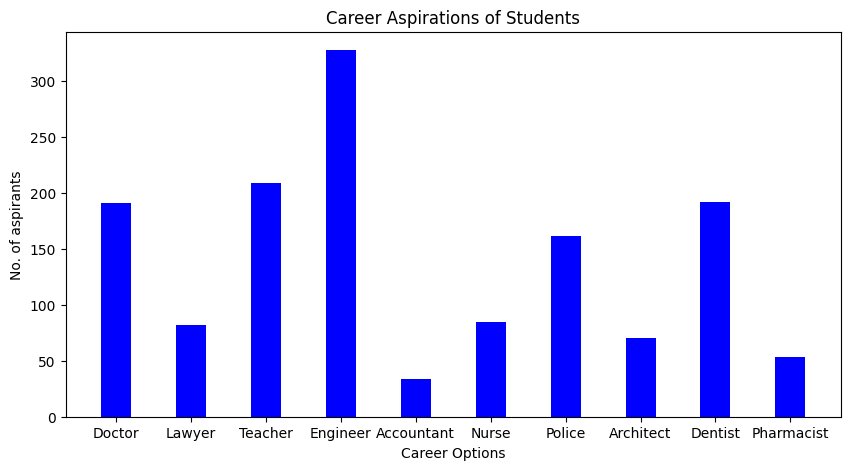

In [4]:
correct=[]     #the corrected spellings are appended here for the graph plotting
for i in data:
    correct.append(coscorrection(i))
graph(correct)


## Jaccard Similarity
The Jaccard similarity coefficient, also known as the Jaccard index, is a measure of similarity between two sets. It is defined as the size of the intersection of the two sets divided by the size of the union of the two sets. The Jaccard similarity coefficient ranges from 0, indicating that the two sets have no elements in common, to 1, indicating that the two sets are identical.<br><br>
To implement this the *words were converted from strings to lists* and then the **union** and **intersection** between them were found out.<br>
The value of intersection by union gives us the **jaccard index** between two strings.


In [5]:
# to convert the word into unique list
def unique(word):
    un=np.unique(np.array(list(word.lower())))
    return un
# finding jaccard similarity between two lists
def js(list1,list2):
    intersection,union=0,len(list1)
    for i in list1:
        if i in list2:
            intersection+=1
    for i in list2:
        if i not in list1:
            union+=1
    return(intersection/union)

# word is checked against every word in correct dataset and the word with max jaccard index is given
def jscorrection(word):
    wordarr=unique(word)
    datasetarr=[]
    for i in career_options:
        datasetarr.append(unique(i))
    jsscore=[]
    for i in datasetarr:
        jsscore.append(js(wordarr,i))
    index=jsscore.index(max(jsscore))
    return career_options[index]

print(jscorrection(tester))

Doctor


Here the Jaccard Similarity matching is executed for each of the mispelled words in the target dataset and a bar graph accordingly is plotted

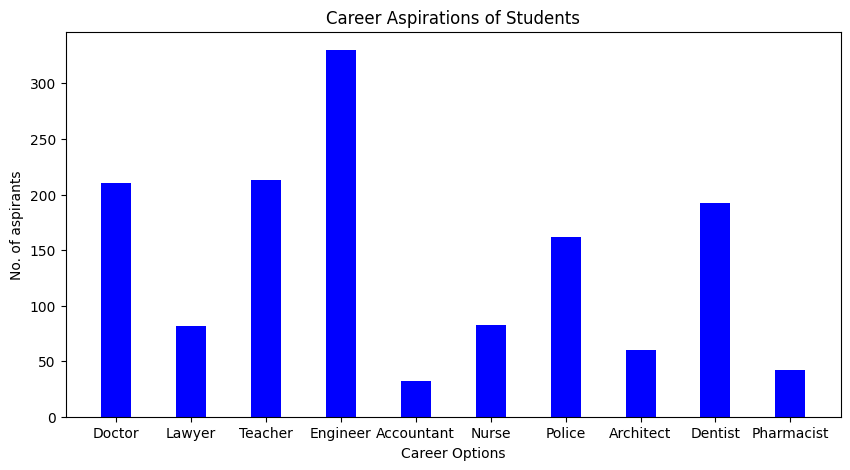

In [6]:
correct=[]          #the corrected spellings are appended here for the graph plotting
for i in data:
    correct.append(jscorrection(i))
graph(correct)

## N Gram Similarity
The n-gram (Q-gram) similarity algorithm is a string-matching algorithm that is
used to compare two strings and determine their similarity. It does this by dividing each
string into substrings of length n (where n is a positive integer), and then comparing the
substrings to determine how many of them are the same in both strings. The result is a
measure of the similarity of the two strings, with a higher value indicating a greater
degree of similarity.
<br><br>
To implement this, we have taken substrings of length `n` from the main strings and then matched the number of substrings to each other. The correct word that shared the most number of n-grams with the target word is most likely to be the actual correct word. 

In [7]:
# generating n_grams of a word
def generate_ngrams(word, n):
    return [word[i:i+n] for i in range(len(word) - n + 1)]
# the n_grams of sample word is checked against n_grams of every word in the correct dataset and the word with max n_gram similarity is returned
def ngramcorrection(word,n=2):
    nsample=generate_ngrams(word,n)
    ntarget=[]
    for i in career_options:
        ntarget.append(generate_ngrams(i.lower(),n))
    ngramsim=[]
    for i in ntarget:
        c=0
        for j in nsample:
            if j in i:
                c+=1
        ngramsim.append(c)
    index=ngramsim.index(max(ngramsim))
    return career_options[index]

print(ngramcorrection(tester,2))

Doctor


Here the N-Gram Similarity matching is executed for each of the mispelled words in the target dataset and a bar graph accordingly is plotted<br>
<div class="alert alert-block alert-danger"> However this method does not seem to be as useful and viable for spelling correction using n grams of characters as it is for word prediction in a sentence</div>

You can also change the number of n-grams (eg: *bigrams* n=2, *trigrams* n=3 ) from the line `correct.append(ngramcorrection(i,n=2))`

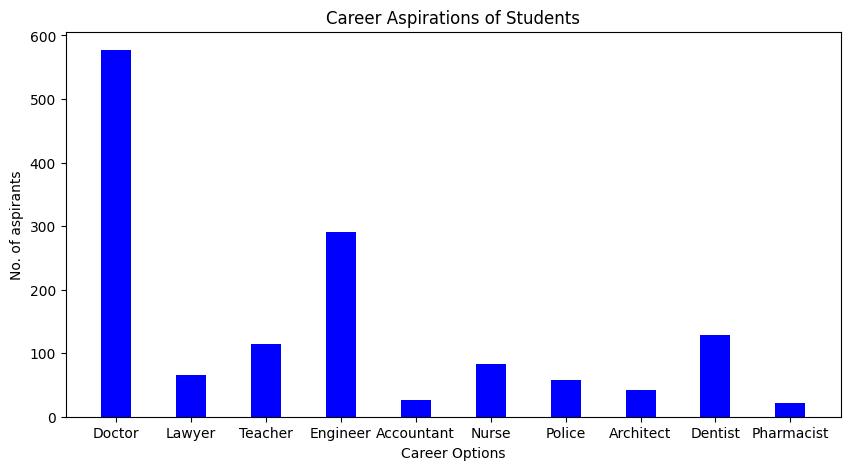

In [8]:
correct=[]          #the corrected spellings are appended here for the graph plotting
for i in data:
    correct.append(ngramcorrection(i,n=2))
graph(correct)

## Levenshtein Distance 
Levenshtein Distance is the count of the minimum number of single-character edits (insertion, deletion, substitution) needed to transform one word into the other. The two words having the least amount of transformative edits or the least levenshtein distance is most likely to be similar.<br><br>
To implement this we create a 2D numpy array of suitable rows and columns. Then we use the piecewise levenshtein distance function and find out the levenshtein distance between two words from the last row last column element in out 2D matrix. We then compare betwwen the target dataset `data` and the correct spelling dataset `career_options` and find each rectified spellings of the misspelled words in the target dataset

In [9]:
def ldcompute(word1, word2):
    rowno = len(word1)+1
    colno = len(word2)+1
    
    # Create a distance matrix and initialize it
    dmat = np.zeros((rowno, colno), dtype=int)
    
    # Initialize the first row and column
    for i in range(rowno):
        dmat[i][0] = i
    for j in range(colno):
        dmat[0][j] = j
    
    # Filling up the matrix using piecewise function of levenshtein distance
    for i in range(1, rowno):
        for j in range(1, colno):
            dmat[i][j] = min(
                dmat[i - 1][j] + 1,     # Deletion
                dmat[i][j - 1] + 1,     # Insertion
                dmat[i - 1][j - 1] + (word1[i - 1] != word2[j - 1])  # Substitution
            )
    
    # The distance is the value in the bottom right corner of the matrix
    return dmat[rowno-1][colno-1]

# word is checked against every word in correct dataset and the word with minimum distance is given
def ldcorrection(word):
    ld_list=[]
    for i in career_options:
        ld_list.append(ldcompute(i.lower(),word.lower()))
    index = ld_list.index(min(ld_list))
    return career_options[index]

print(ldcorrection(tester))

Doctor


Here the Levenshtein Distance matching is executed for each of the mispelled words in the target dataset and a bar graph accordingly is plotted

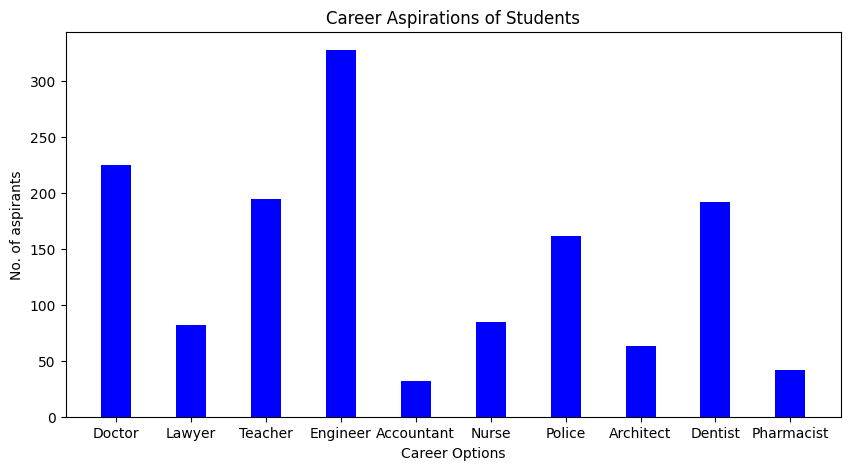

In [10]:
correct=[]            #the corrected spellings are appended here for the graph plotting
for i in data:
    correct.append(ldcorrection(i))
graph(correct)